# Big Data y Machine Learning (UBA) - 2025

# Trabajo Práctico 2


## Parte I: Familiarizandonos con la base EPH y limpieza


#### 1) Mediante la Encuesta Permanente de Hogares, se entrevista a una muestra controlada de la población argentina. Con controlada referimos a diversificar las personas y hogares que fueron entrevistadas, por ejemplo, se entrevista a personas de 31 aglomerados urbanos del pais. Pero como dijimos, es una muestra, por lo que posteriormente se pondera según la población del aglomerado para estimar los resultados de la población total (aunque solo se estima para casi 30 millones de personas). Aquí luego se discrimina por población economicamente activa (patrones, ocupados, desempleados) e inactiva (estudiantes, jubilados, etc.). Dentro de los activos, encontramos a los desocupados que buscan un empleo y no lo encuentran. Con este dato y la población economicamente activa, encontramos la tasa de desempleo del trimestre en cuestión.

#### 2)

In [1]:
# IMPORTO LA LIBRERIA Y LOS ARCHIVOS
import pandas as pd

T1_24=pd.read_excel('/Users/tadeo/OneDrive - Económicas - UBA/ECONOMÍA/BIG DATA/base de datos/usu_individual_T124.xlsx')

T1_04=pd.read_stata("/Users/tadeo/OneDrive - Económicas - UBA/ECONOMÍA/BIG DATA/base de datos/usu_individual_T104.dta")

In [1]:
# IMPORTO LA LIBRERIA Y LOS ARCHIVOS (PABLO)
import pandas as pd

T1_24=pd.read_excel("C:/Users/Computador/Desktop/Facultad/Big Data/TP2_Introducción a la EPH/usu_individual_T124.xlsx")

T1_04=pd.read_stata("C:/Users/Computador/Desktop/Facultad/Big Data/TP2_Introducción a la EPH/usu_individual_T104.dta")

## Inciso a

In [3]:
# ELIJO LA REGIÓN PAMPEANA
PAMP24 = T1_24[(T1_24['REGION']==43)]
PAMP04 = T1_04[(T1_04['region'] =='Pampeana')]

In [5]:
# PONGO EN MAYUSCULA TODAS LAS COLUMNAS
PAMP04.columns = PAMP04.columns.str.upper()
PAMP24.columns = PAMP24.columns.str.upper()

In [7]:
# OBSERVO QUE TIPO DE DATO TIENE CADA DATAFRAME EN LA VARIABLE REGION
print(PAMP04['REGION'].dtype) # CATEGORY
print(PAMP24['REGION'].dtype) # INT64
# COMO SON TIPOS DISTINTOS, CAMBIO UNO DE ELLOS
PAMP04["REGION"] = 43

PAMP04 # VERIFICO QUE LOS CAMBIOS SE EJECUTARON CORRECTAMENTE

category
int64


C:\Users\Computador\AppData\Local\Temp\ipykernel_14088\1415608241.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PAMP04["REGION"] = 43


,CODUSU,NRO_HOGAR,COMPONENTE,H15,ANO4,TRIMESTRE,REGION,MAS_500,AGLOMERADO,PONDERA,...,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PJ1_1,PJ2_1,PJ3_1,IDIMPP
27204,125051,1.0,1.0,Sí,2004.0,1er. Trimestre,43,S,Gran La Plata,355.0,...,01,02,01,01,,01,Tiene plan jefas y jefes,0.0,0.0,00000
27205,125051,1.0,2.0,Sí,2004.0,1er. Trimestre,43,S,Gran La Plata,355.0,...,01,02,01,01,,01,0.0,0.0,0.0,00000
27206,125051,1.0,3.0,Sí,2004.0,1er. Trimestre,43,S,Gran La Plata,355.0,...,01,02,01,01,,01,0.0,0.0,0.0,00000
27207,125051,1.0,4.0,Sí,2004.0,1er. Trimestre,43,S,Gran La Plata,355.0,...,01,02,01,01,,01,0.0,0.0,0.0,00000
27208,125051,1.0,5.0,0.0,2004.0,1er. Trimestre,43,S,Gran La Plata,355.0,...,01,02,01,01,,01,0.0,0.0,0.0,00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42020,288189,1.0,2.0,Sí,2004.0,1er. Trimestre,43,N,Río Cuarto,193.0,...,01,01,01,,01,01,0.0,0.0,0.0,00000
42021,288189,1.0,3.0,Sí,2004.0,1er. Trimestre,43,N,Río Cuarto,193.0,...,01,01,01,,01,01,0.0,0.0,0.0,00000
42022,288189,1.0,4.0,Sí,2004.0,1er. Trimestre,43,N,Río Cuarto,193.0,...,01,01,01,,01,01,0.0,0.0,0.0,00000
42023,288189,1.0,5.0,0.0,2004.0,1er. Trimestre,43,N,Río Cuarto,193.0,...,01,01,01,,01,01,0.0,0.0,0.0,00000


In [9]:
#UNO AMBAS BASES DE DATOS
PAMPA = pd.concat([PAMP04, PAMP24])

#VERIFICO QUE SE HAYAN UNIDO CORRECTAMENTE
PAMPA

,CODUSU,NRO_HOGAR,COMPONENTE,H15,ANO4,TRIMESTRE,REGION,MAS_500,AGLOMERADO,PONDERA,...,ADECCFR,PJ1_1,PJ2_1,PJ3_1,IDIMPP,CH05,IMPUTA,PONDIIO,PONDII,PONDIH
27204,125051,1.0,1.0,Sí,2004.0,1er. Trimestre,43,S,Gran La Plata,355.0,...,01,Tiene plan jefas y jefes,0.0,0.0,00000,NaN,NaN,NaN,NaN,NaN
27205,125051,1.0,2.0,Sí,2004.0,1er. Trimestre,43,S,Gran La Plata,355.0,...,01,0.0,0.0,0.0,00000,NaN,NaN,NaN,NaN,NaN
27206,125051,1.0,3.0,Sí,2004.0,1er. Trimestre,43,S,Gran La Plata,355.0,...,01,0.0,0.0,0.0,00000,NaN,NaN,NaN,NaN,NaN
27207,125051,1.0,4.0,Sí,2004.0,1er. Trimestre,43,S,Gran La Plata,355.0,...,01,0.0,0.0,0.0,00000,NaN,NaN,NaN,NaN,NaN
27208,125051,1.0,5.0,0.0,2004.0,1er. Trimestre,43,S,Gran La Plata,355.0,...,01,0.0,0.0,0.0,00000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46001,TQRMNOQQYHLMKNCDEFKID00851884,1.0,2,1,2024.0,1,43,S,4,585.0,...,12,NaN,NaN,NaN,NaN,1900-01-01 00:00:00,NaN,786.0,749.0,0.0
46002,TQRMNOQQYHLMKNCDEFKID00851884,1.0,3,1,2024.0,1,43,S,4,585.0,...,12,NaN,NaN,NaN,NaN,1900-01-01 00:00:00,NaN,773.0,788.0,0.0
46003,TQRMNOQQYHLMKNCDEFKID00851884,1.0,4,1,2024.0,1,43,S,4,585.0,...,12,NaN,NaN,NaN,NaN,1900-01-01 00:00:00,NaN,585.0,585.0,0.0
46004,TQRMNOQQYHLMKNCDEFKID00851884,1.0,5,1,2024.0,1,43,S,4,585.0,...,12,NaN,NaN,NaN,NaN,1900-01-01 00:00:00,NaN,585.0,585.0,0.0


## Inciso b

In [11]:
# ELIJO 15 VARIABLES DE INTERES
CATEGORIAS_ELEGIDAS = ['ANO4','AGLOMERADO','CH04','CH06','CH07','CH08','CH09','NIVEL_ED','ESTADO','CAT_OCUP','CAT_INAC','PP10A','PP10D','IPCF','DECCFR']

# FILTRO
PAMPA_B = PAMPA[CATEGORIAS_ELEGIDAS]

PAMPA_B

,ANO4,AGLOMERADO,CH04,CH06,CH07,CH08,CH09,NIVEL_ED,ESTADO,CAT_OCUP,CAT_INAC,PP10A,PP10D,IPCF,DECCFR
27204,2004.0,Gran La Plata,Varón,52.0,Casado,No paga ni le descuentan,Sí,Secundaria Incompleta,Ocupado,Obrero o empleado,0.0,0.0,0.0,71.4,01
27205,2004.0,Gran La Plata,Mujer,40.0,Casado,No paga ni le descuentan,Sí,Secundaria Incompleta,Ocupado,Obrero o empleado,0.0,0.0,0.0,71.4,01
27206,2004.0,Gran La Plata,Mujer,19.0,Soltero,No paga ni le descuentan,Sí,Secundaria Completa,Ocupado,Obrero o empleado,0.0,0.0,0.0,71.4,01
27207,2004.0,Gran La Plata,Varón,14.0,Soltero,No paga ni le descuentan,Sí,Secundaria Incompleta,Inactivo,0.0,Estudiante,0.0,0.0,71.4,01
27208,2004.0,Gran La Plata,Varón,9.0,Soltero,No paga ni le descuentan,Sí,Primaria Incompleta (incluye educación especial),Menor de 10 años,0.0,Estudiante,0.0,0.0,71.4,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46001,2024.0,4,2,51,2,1,1,4,1,3,0,NaN,NaN,0.0,12
46002,2024.0,4,1,27,5,1,1,5,1,3,0,NaN,NaN,0.0,12
46003,2024.0,4,2,23,5,1,1,5,2,2,0,2.0,1.0,0.0,12
46004,2024.0,4,1,19,5,1,1,5,3,0,3,NaN,NaN,0.0,12


In [13]:
#VEO QUE VALORES HAY EN CADA VARIABLE
for i in CATEGORIAS_ELEGIDAS:
    print(f"\n--- {i} ---")
    print(PAMPA_B[i].value_counts(dropna=False))


--- ANO4 ---
ANO4
2004.0    14821
2024.0    14410
Name: count, dtype: int64

--- AGLOMERADO ---
AGLOMERADO
Gran Córdoba             2792
Gran Rosario             2465
13                       2169
Gran La Plata            1730
4                        1679
Mar del Plata - Batán    1679
38                       1470
Gran Santa Fe            1421
6                        1401
14                       1373
5                        1332
Gran Paraná              1166
Bahía Blanca - Cerri     1156
36                       1099
2                        1040
3                        1008
34                        971
Concordia                 966
30                        868
Río Cuarto                747
Santa Rosa - Toay         699
Name: count, dtype: int64

--- CH04 ---
CH04
Mujer    7740
2        7454
Varón    7081
1        6956
Name: count, dtype: int64

--- CH06 ---
CH06
21.0     566
24.0     543
18.0     534
23.0     533
12.0     532
        ... 
97.0       4
99.0       3
98.0       2

In [15]:
#APOYANDOME EN EL DISEÑO DE REGISTRO DE LA EPH Y EN LA INFORMACIÓN DE LA CELDA ANTERIOR, MODIFICO LOS VALORES PARA LOGRAR UNA BASE HOMOGENEA

#CAMBIO LOS FLOTANTES POR ENTEROS
PAMPA_B["ANO4"] = PAMPA_B["ANO4"].astype("Int64")


#CREO DICCIONARIO DONDE CAMBIO LOS VALORES
AGLOMERADO_B = {                                                          
    "Gran La Plata":2,
    "Bahía Blanca - Cerri":3,
    "Gran Rosario":4,
    "Gran Santa Fe":5,
    "Gran Paraná":6,
    "Gran Córdoba":13,
    "Concordia":14,
    "Santa Rosa - Toay":30,
    "Mar del Plata - Batán":34,
    "Río Cuarto":36
}
#REEMPLAZO EL DICCIONARIO EN LA COLUMNA
PAMPA_B["AGLOMERADO"] = PAMPA_B["AGLOMERADO"].replace(AGLOMERADO_B)          


#CREO DICCIONARIO DONDE CAMBIO LOS VALORES
CH04_B = {                                                                   
    "Varón":1,
    "Mujer":2
}
#REEMPLAZO EL DICCIONARIO EN LA COLUMNA
PAMPA_B["CH04"] = PAMPA_B["CH04"].replace(CH04_B)                                         


#CH06 CORRESPONDE A LA EDAD, QUIERO QUE ESTEN TODOS EN ENTEROS, PERO ANTES CAMBIO "Menos de 1 año" A -1 YA QUE ES COMO REGISTRA 
#A LOS MENORES DE 1 AÑO EN 2024
#TAMBIEN HAY 7 PERSONAS EN 2004 BAJO EL VALOR "98 y más años", LO CAMBIO A 98
CH06_B = {
    "Menos de 1 año":-1,
    "98 y más años":98
}
#REEMPLAZO EL DICCIONARIO EN LA COLUMNA
PAMPA_B["CH06"] = PAMPA_B["CH06"].replace(CH06_B)
#CAMBIO LOS FLOTANTES POR ENTEROS
PAMPA_B["CH06"] = PAMPA_B["CH06"].astype("Int64")                        


#CREO DICCIONARIO DONDE CAMBIO LOS VALORES
CH07_B = {
    "Unido":1,
    "Casado":2,
    "Separado o divorciado":3,
    "Viudo":4,
    "Soltero":5,
    "Ns./Nr.":0
}
#REEMPLAZO EL DICCIONARIO EN LA COLUMNA
PAMPA_B["CH07"] = PAMPA_B["CH07"].replace(CH07_B)


#CREO DICCIONARIO DONDE CAMBIO LOS VALORES
CH08_B = {
    "Obra social (incluye PAMI)":1,
    "Mutual/Prepaga/Servicio de emergencia":2,
    "Planes y seguros públicos":3,
    "No paga ni le descuentan":4,
    "Ns./Nr.":9,
    "Obra social y mutual/prepaga/servicio de emergencia":12,
    "Obra social y planes y seguros públicos":13,
    "Mutual/prepaga/servicio de emergencia/planes y seguros públi":23,
    "Obra social, mutual/prepaga/servicio de emergencia y planes":123
}
#REEMPLAZO EL DICCIONARIO EN LA COLUMNA
PAMPA_B["CH08"] = PAMPA_B["CH08"].replace(CH08_B)


#CREO DICCIONARIO DONDE CAMBIO LOS VALORES
CH09_B = {
    "Sí":1,
    "No":2,
    "Menor de 2 años":3
}
#REEMPLAZO EL DICCIONARIO EN LA COLUMNA
PAMPA_B["CH09"] = PAMPA_B["CH09"].replace(CH09_B)


#CREO DICCIONARIO DONDE CAMBIO LOS VALORES
NIVEL_ED_B = {
    "Primaria Incompleta (incluye educación especial)":1,
    "Primaria Completa":2,
    "Secundaria Incompleta":3,
    "Secundaria Completa":4,
    "Superior Universitaria Incompleta":5,
    "Superior Universitaria Completa":6,
    "Sin instrucción":7
}
#REEMPLAZO EL DICCIONARIO EN LA COLUMNA
PAMPA_B["NIVEL_ED"] = PAMPA_B["NIVEL_ED"].replace(NIVEL_ED_B)


#CREO DICCIONARIO DONDE CAMBIO LOS VALORES 
ESTADO_B = {
    "Entrevista individual no realizada (no respuesta al cuestion":0,
    "Ocupado":1,
    "Desocupado":2,
    "Inactivo":3,
    "Menor de 10 años":4
}
#REEMPLAZO EL DICCIONARIO EN LA COLUMNA
PAMPA_B["ESTADO"] = PAMPA_B["ESTADO"].replace(ESTADO_B)


#CREO DICCIONARIO DONDE CAMBIO LOS VALORES
CAT_OCUP_B = {
    "Patrón":1,
    "Cuenta propia":2,
    "Obrero o empleado":3,
    "Trabajador familiar sin remuneración":4
}
#REEMPLAZO EL DICCIONARIO EN LA COLUMNA 
PAMPA_B["CAT_OCUP"] = PAMPA_B["CAT_OCUP"].replace(CAT_OCUP_B)
#CAMBIO LOS FLOTANTES POR ENTEROS (0.0 LOS CAMBIO A 0)
PAMPA_B["CAT_OCUP"] = PAMPA_B["CAT_OCUP"].astype("Int64") 


#CREO DICCIONARIO DONDE CAMBIO LOS VALORES
CAT_INAC_B = {
    "Jubilado/pensionado":1,
    "Rentista":2,
    "Estudiante":3,
    "Ama de casa":4,
    "Menor de 6 años":5,
    "Discapacitado":6,
    "Otros":7
}
#REEMPLAZO EL DICCIONARIO EN LA COLUMNA 
PAMPA_B["CAT_INAC"] = PAMPA_B["CAT_INAC"].replace(CAT_INAC_B)
#CAMBIO LOS FLOTANTES POR ENTEROS (0.0 LOS CAMBIO A 0)
PAMPA_B["CAT_INAC"] = PAMPA_B["CAT_INAC"].astype("Int64")


#CREO DICCIONARIO DONDE CAMBIO LOS VALORES (ENGLOBO NO SABE NO RESPONDE EN 0)
PP10A_B = {
    "...menos de 1 mes?":1,
    "...de 1 a 3 meses?":2,
    "...más de 3 a 6 meses?":3,
    "...más de 6 a 12 meses?":4,
    "...más de 1 año?":5
}
#REEMPLAZO EL DICCIONARIO EN LA COLUMNA 
PAMPA_B["PP10A"] = PAMPA_B["PP10A"].replace(PP10A_B)
#CAMBIO LOS FLOTANTES POR ENTEROS
PAMPA_B["PP10A"] = PAMPA_B["PP10A"].astype("Int64")


#CREO DICCIONARIO DONDE CAMBIO LOS VALORES
PP10D_B = {
    "Sí":1,
    "No":2   
}
#REEMPLAZO EL DICCIONARIO EN LA COLUMNA 
PAMPA_B["PP10D"] = PAMPA_B["PP10D"].replace(PP10D_B)
#CAMBIO LOS FLOTANTES POR ENTEROS
PAMPA_B["PP10D"] = PAMPA_B["PP10D"].astype("Int64")


#CREO DICCIONARIO DONDE CAMBIO LOS VALORES
DECCFR_B = {
    "01":1,
    "02":2,
    "03":3,
    "04":4,
    "05":5,
    "06":6,
    "07":7,
    "08":8,
    "09":9,
    "10":10,
    "00":0
}
#REEMPLAZO EL DICCIONARIO EN LA COLUMNA 
PAMPA_B["DECCFR"] = PAMPA_B["DECCFR"].replace(DECCFR_B)



#VEO QUE EFECTIVAMENTE HAY UN SOLO TIPO DE DE DATO POR VARIABLE (SI HUBIESE DISTINTOS TIPOS DIRÍA object)
PAMPA_B.dtypes

C:\Users\Computador\AppData\Local\Temp\ipykernel_14088\2559385427.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PAMPA_B["ANO4"] = PAMPA_B["ANO4"].astype("Int64")
C:\Users\Computador\AppData\Local\Temp\ipykernel_14088\2559385427.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  PAMPA_B["AGLOMERADO"] = PAMPA_B["AGLOMERADO"].replace(AGLOMERADO_B)
C:\Users\Computador\AppData\Local\Temp\ipykernel_14088\2559385427.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

ANO4            Int64
AGLOMERADO      int64
CH04            int64
CH06            Int64
CH07            int64
CH08            int64
CH09            int64
NIVEL_ED        int64
ESTADO          int64
CAT_OCUP        Int64
CAT_INAC        Int64
PP10A           Int64
PP10D           Int64
IPCF          float64
DECCFR          int64
dtype: object

In [17]:
import numpy as np

In [19]:
#REEMPLAZO LOS 9 (NS/NR) DE CH08 (COBERTURA MÉDICA) POR 0, ASI TODOS LOS NS/NR SON 0s 
PAMPA_B["CH08"] = PAMPA_B["CH08"].replace(9, 0)

#PARA LAS COLUMNAS PP07J Y PP11O, LOS INACTIVOS EN EL 2024 NO REGISTRAN DATOS (NO LES CORRESPONDE RESPONDER) Y EN 2004 SON 0s
#LOS OTROS 0s CORRESPONDEN A NO SABE/NO RESPONDE, LOS CAMBIAMOS POR NaN PARA HOMOGENEIZAR LA BASE DE DATOS
COLUMNAS=["PP10A","PP10D","CH07","CH08","ESTADO"]

#COPIO LA BASE PARA TRABAJAR SOBRE UNA COPIA
PAMPA_B_SIN_0s = PAMPA_B.copy()

#REEMPLAZO LOS 0s POR NaN
PAMPA_B_SIN_0s[COLUMNAS] = PAMPA_B_SIN_0s[COLUMNAS].replace(0, np.nan)

#ALGUNAS COLUMNAS CAMBIARON A float LOS VOLVEMOS A PONER COMO ENTEROS
PAMPA_B_SIN_0s["ESTADO"] = PAMPA_B_SIN_0s["ESTADO"].astype("Int64") 
PAMPA_B_SIN_0s["CH07"] = PAMPA_B_SIN_0s["CH07"].astype("Int64") 
PAMPA_B_SIN_0s["CH08"] = PAMPA_B_SIN_0s["CH08"].astype("Int64") 

#VERIFICO QUE SE HAYAN APLICADO LOS CAMBIOS A LA COPIA
PAMPA_B_SIN_0s

C:\Users\Computador\AppData\Local\Temp\ipykernel_14088\2314534288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PAMPA_B["CH08"] = PAMPA_B["CH08"].replace(9, 0)


,ANO4,AGLOMERADO,CH04,CH06,CH07,CH08,CH09,NIVEL_ED,ESTADO,CAT_OCUP,CAT_INAC,PP10A,PP10D,IPCF,DECCFR
27204,2004,2,1,52,2,4,1,3,1,3,0,<NA>,<NA>,71.4,1
27205,2004,2,2,40,2,4,1,3,1,3,0,<NA>,<NA>,71.4,1
27206,2004,2,2,19,5,4,1,4,1,3,0,<NA>,<NA>,71.4,1
27207,2004,2,1,14,5,4,1,3,3,0,3,<NA>,<NA>,71.4,1
27208,2004,2,1,9,5,4,1,1,4,0,3,<NA>,<NA>,71.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46001,2024,4,2,51,2,1,1,4,1,3,0,<NA>,<NA>,0.0,12
46002,2024,4,1,27,5,1,1,5,1,3,0,<NA>,<NA>,0.0,12
46003,2024,4,2,23,5,1,1,5,2,2,0,2,1,0.0,12
46004,2024,4,1,19,5,1,1,5,3,0,3,<NA>,<NA>,0.0,12


In [21]:
#HAGO UNA TABLA CON LA CANTIDAD DE NaN EN CADA VARIABLE SEGUN EL AÑO
PAMPA_B_NaN = PAMPA_B_SIN_0s.groupby("ANO4").agg(lambda x: x.isna().sum())

PAMPA_B_NaN

,AGLOMERADO,CH04,CH06,CH07,CH08,CH09,NIVEL_ED,ESTADO,CAT_OCUP,CAT_INAC,PP10A,PP10D,IPCF,DECCFR
ANO4,,,,,,,,,,,,,,
2004,0,0,0,1,35,0,0,12,0,0,13786,14171,0,0
2024,0,0,0,0,23,0,0,15,0,0,13957,14154,0,0


## Inciso c

In [23]:
PAMPA_C = PAMPA_B_SIN_0s

#BUSCO QUE VALORES NO TIENEN SENTIDO
for i in CATEGORIAS_ELEGIDAS:
    print(PAMPA_C[i].unique())

# 12 Y 0 (AL MISMO TIEMPO) EN DECCFR (EN QUE DECIL DE LA SOCIEDAD SE ENCUENTRA EL INGRESO FAMILIAR DEL HOGAR PER CÁPITA)
PAMPA_C['DECCFR'] = PAMPA_C['DECCFR'].replace(12, 0)

<IntegerArray>
[2004, 2024]
Length: 2, dtype: Int64
[ 2  3  4  5  6 13 14 30 34 36 38]
[1 2]
<IntegerArray>
[ 52,  40,  19,  14,   9,  27,  29,   3,  50,  18,
 ...
  78,  98,  91,  92,  94,  96,  99, 101,  97, 100]
Length: 102, dtype: Int64
<IntegerArray>
[2, 5, 1, 3, 4, <NA>]
Length: 6, dtype: Int64
<IntegerArray>
[4, 2, 1, 12, 123, 13, <NA>, 3, 23]
Length: 9, dtype: Int64
[1 2 3]
[3 4 1 2 6 7 5]
<IntegerArray>
[1, 3, 4, 2, <NA>]
Length: 5, dtype: Int64
<IntegerArray>
[3, 0, 1, 2, 4]
Length: 5, dtype: Int64
<IntegerArray>
[0, 3, 5, 1, 4, 6, 2, 7]
Length: 8, dtype: Int64
<IntegerArray>
[<NA>, 5, 2, 3, 4, 1]
Length: 6, dtype: Int64
<IntegerArray>
[<NA>, 2, 1]
Length: 3, dtype: Int64
[7.14000000e+01 1.67333333e+02 6.66666667e+02 ... 1.40600000e+05
 4.87500000e+05 1.65000000e+04]
[ 1  4  9  8  3  5  0  7  6 10  2 12]


In [25]:
#RESULTADO DE NUESTRA BASE DE DATOS
PAMPA_C

,ANO4,AGLOMERADO,CH04,CH06,CH07,CH08,CH09,NIVEL_ED,ESTADO,CAT_OCUP,CAT_INAC,PP10A,PP10D,IPCF,DECCFR
27204,2004,2,1,52,2,4,1,3,1,3,0,<NA>,<NA>,71.4,1
27205,2004,2,2,40,2,4,1,3,1,3,0,<NA>,<NA>,71.4,1
27206,2004,2,2,19,5,4,1,4,1,3,0,<NA>,<NA>,71.4,1
27207,2004,2,1,14,5,4,1,3,3,0,3,<NA>,<NA>,71.4,1
27208,2004,2,1,9,5,4,1,1,4,0,3,<NA>,<NA>,71.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46001,2024,4,2,51,2,1,1,4,1,3,0,<NA>,<NA>,0.0,0
46002,2024,4,1,27,5,1,1,5,1,3,0,<NA>,<NA>,0.0,0
46003,2024,4,2,23,5,1,1,5,2,2,0,2,1,0.0,0
46004,2024,4,1,19,5,1,1,5,3,0,3,<NA>,<NA>,0.0,0


## Parte II: Primer Análisis Exploratorio

#### 3)

In [27]:
import matplotlib.pyplot as plt

In [29]:
#PRIMERO ARMO LA TABLA CON CANTIDAD DE VARONES Y MUJERES SEGUN EL AÑO
PAMPA_3 = PAMPA_C.groupby("ANO4")["CH04"].value_counts().unstack(fill_value=0)
PAMPA_3.reset_index(inplace=True)

#CAMBIO EL NOMBRE DE LAS COLUMNAS
PAMPA_3.rename(columns={1:"Varones", 2:"Mujeres"}, inplace=True)

PAMPA_3 = PAMPA_3.set_index("ANO4")

PAMPA_3

CH04,Varones,Mujeres
ANO4,,
2004,7081,7740
2024,6956,7454


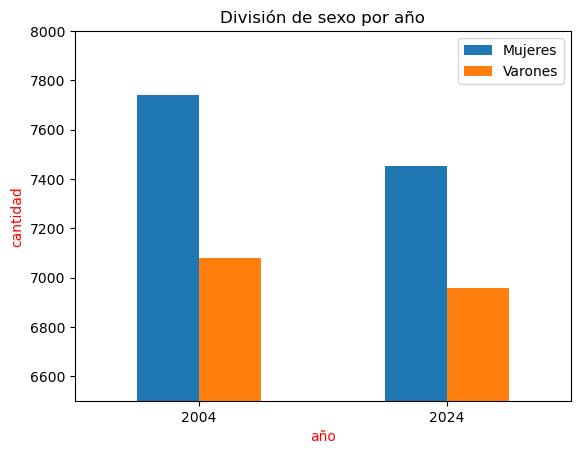

In [31]:
ax = PAMPA_3[["Mujeres", "Varones"]].plot(kind="bar", title="División de sexo por año")
ax.set_xlabel("año",color="red")
ax.set_ylabel("cantidad",color="red")
ax.set_ylim(6500, 8000)               #HAGO QUE SE VEA DE ESOS VALORES ASI SE NOTA MEJOR LA DIFERENCIA
ax.tick_params(axis="x", rotation=0)
ax.legend(["Mujeres","Varones"])

#### 4)

In [33]:
import seaborn as sns

<Axes: >

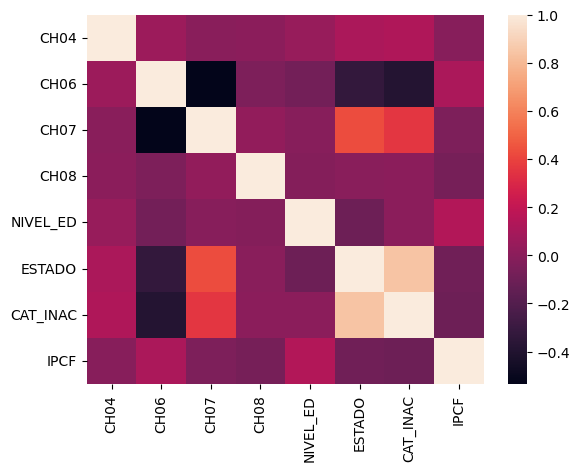

In [35]:
#ME QUEDO SOLO CON LAS VARIABLES CORRESPONDIENTES
PUNTO_4 = ["CH04", "CH06", "CH07", "CH08", "NIVEL_ED", "ESTADO", "CAT_INAC", "IPCF"]
PAMPA_4 = PAMPA_C[PUNTO_4]

sns.heatmap(PAMPA_4.corr())
